# **Entendendo o Fast Nondominated Sorting Genetic Algorithm II (NSGA II)**

A NSGA é um algoritmo amplamente utilizado para problemas multiobjetivo. De modo geral, normalmente problemas com mais de um objetivo demonstram-se conflitantes à medida que se torna mais complicado encontrar o melhor resultado para diferentes possibilidades de 'respostas corretas'. No entanto, cabe a interpretação de que não é possível ser retornado apenas um único valor como resposta para o problema. Neste trabalho, estamos tratando de problemas cujos objetivos são minimizar duas funções matemáticas simultaneamente. Considerando o primeiro problema BINH1, temos as funções: 

$$f_1(x) = x_1^2 + x_2^2$$ 

$$f_2(x) = (x_1 - 5)^2 + (x_2 - 5)^2$$

em que $x_1$ e $x_2$ são duas variáveis as quais estão restritas ao intervalo

$$ -5 \leq x_i \leq 10$$ 

sendo i = 1,2.

Assim, a função objetivo é dada por:

In [2]:
def funcoes_objetivo(candidato):

    f1 = candidato[0]**2 + candidato[1]**2
    f2 = (candidato[0] -  5)**2 + (candidato[1] -  5)**2
    
    return [f1, f2]
    
def funcoes_objetivo_populacao(populacao):
    
    fitness = []
    
    for candidato in populacao:
        fitness.append(funcoes_objetivo(candidato))
    
    return fitness

Todo o trabalho se resume no pseudocódigo de NSGA II oriundo dos artigos principais de referência:

### Pseudocódigo NSGA-II
- 1: Gerar população inicial aleatoriamente
- 2: Avaliar valor das funções objetivo para cada indivíduo da população
- 3: Atribuir ranks às soluções, baseando-se na dominância
- 4: Gerar uma população de soluções filhas (seleção por torneio binário, crossover e mutação)
- 5: **Enquanto** critério de parada não for satisfeito
- 6: Atribuir ranks às soluções, baseando-se na dominância
- 7: Preencher população com grupos de menor rank e calcular a crowding distance
- 8: Truncar população baseando-se na crowding distance
- 9: Criar próxima geração (seleção por torneio binário, crossover e mutação)
- 10: Fim **Enquanto**

Dessa maneira, para a compreensão da tradução do pseudocódigo em Python, nos é introduzido, inicialmente, dois conceitos importantes: a dominância e a fronteira de Pareto.

## Dominância
Dominância representa uma análise comparativa sobre objetos, par a par, de maneira que retorna se o indivíduo 1 é capaz de dominar o indivíduo 2 a partir do objetivo do problema. Nesse caso, a análise é feita comparando cada gene do indivíduo - sendo um total de 2, uma vez que são duas variáveis $x_1$ e $x_2$. Considerando que o nosso objetivo é minimizar as funções objetivo, indivíduo domina o outro se: 

- Pelo menos uma das soluções precisa ser menor do que a mesma solução do outro indivíduo comparado
- A segunda solução for pelo menos igual ou menor do que a mesma solução do outro indivíduo comparado

Caso de indiferença em relação à dominância:
- Se uma das soluções é maior do que a mesma solução do outro indivíduo comparado
- Se a outra solução é menor ou igual à mesma solução do outro indivíduo comparado

Caso em que um indivíduo é dominado:
- Ambas as soluções são maiores em relação às soluções do outro indivíduo comparado

Em código, implementamos essa ideia função definida no script:

In [1]:
def verifica_dominancia(candidato_1, candidato_2):
    '''Verifica se o individuo 1 domina o 2'''
    
    pontuacao = 0
    domina = None
    
    objetivos_candidato_1 = funcoes_objetivo(candidato_1)
    objetivos_candidato_2 = funcoes_objetivo(candidato_2)
    
    for o_1, o_2 in zip(objetivos_candidato_1, objetivos_candidato_2):
        if o_1 <= o_2:
            pontuacao += 1
            if o_1 < o_2:
                pontuacao += 1
    
    if pontuacao > 2:
        domina = True
    else:
        domina = False
        
    return domina

## Fronteira de Pareto
A fronteira de Pareto diz respeito àquelas soluções em que o indivíduo consegue 'ganhar' em ambos objetivos, isto é, ser menor em ambas soluções. Isso nos retorna não somente um, mas vários indivíduos que possuem essa característica de serem 'não-dominados', o que garante essa fronteira formada. Com isso, buscamos entender a ideia de 'frentes' e 'rank'.

![img](https://www.researchgate.net/profile/Eduardo-Cunha-5/publication/353913856/figure/fig2/AS:1056899323686912@1628995843102/Figura-2-Comportamento-da-Fronteira-de-Pareto-em-analises-multiobjetivo.ppm)

## Rank
No NSGA, cada indivíduo deve ser analisado de modo que se torna necessário saber por *quais* indivíduos ele é dominado e *quantos* ele é capaz de dominar. Por isso, é atribuído um *grau de dominância*, sendo esse grau definido a partir da situação em que o candidato se qualifica a partir das condições anteriores. Se ele está em uma condição de 'não dominância' (ou seja, ninguém domina ele), deve ser adicionado a uma lista com 'rank' 1. Cada rank representa um conjunto de indivíduos com mesmos valores de rank. Quanto menor esse valor, melhor é a posição de privilégio em relação a outros indivíduos com diferentes graus de dominância. 

Segundo (HERRERA, J. 2021), para realizar o ranqueamento no algoritmo NSGA, primeiro é preciso determinar como cada indivíduo da população domina ou é dominado pelos outros indivíduos. Com base nessas relações de dominância, é atribuído o rank 1 a todas as soluções que não são dominadas por nenhuma outra solução na população. Em seguida, essas soluções já ranqueadas são removidas da consideração, e o rank 2 é atribuído às soluções não-dominadas dentro do subconjunto restante. Esse processo é repetido, atribuindo o próximo rank às novas soluções não-dominadas no subconjunto reduzido, até que todos os indivíduos da população tenham recebido um rank. Dessa forma, um indivíduo classificado com o rank N é dominado apenas por soluções com ranks inferiores a N, sendo que pelo menos uma dessas soluções pertence ao rank N-1.

## Frente
A lista em que os indivíduos são separados por rank são chamados de *frentes*. Essas frentes são uma reorganização da população de modo em separá-la em grupos de preferência para serem chamados e selecionados para a próxima população a ser formada. 

![img](https://www.researchgate.net/profile/Farshid-Jafarian/publication/259585020/figure/fig1/AS:297219400978432@1447874035241/Basics-of-NSGA-II-procedure.png)


O código que atribui a lógica acima explicada está indicado abaixo:

In [ ]:
def fast_non_dominated_sort(populacao):
    
    numero_dominam = []
    rank = {}
    nao_dominados = [] #lista de indivíduos que não são dominados
    todos_os_dominados = [] #lista que tem como elementos listas que armazenam todos os individuos dominados por cada individuo
    
    for i in range(len(populacao)):
        dominam = 0
        dominados = [] #dominados pelo individuo_1        
        for j in range(len(populacao)):
            
            if i != j:
                
                individuo_1 = populacao[i]
                individuo_2 = populacao[j]

                if verifica_dominancia(individuo_1, individuo_2) == True:
                    dominados.append(tuple(individuo_2))
                elif verifica_dominancia(individuo_2, individuo_1) == True:
                    dominam += 1
    
        if dominam == 0:
            rank[tuple(individuo_1)] = [i, 1] #individuos não dominados tem rank 1
            nao_dominados.append(tuple(individuo_1))
            
        numero_dominam.append(dominam)
        todos_os_dominados.append(dominados)
        
    guarda_nao_dominados = nao_dominados.copy()
    guarda_todos_os_dominados = todos_os_dominados.copy()
    guarda_numero_dominam = numero_dominam.copy()

    contador_rank = 1
    valor_rank = 0
    todas_as_frentes = [] #lista que tem como elementos outras listas, cada uma armazenando todos os individuos das diferentes frentes. Essa lista fica ordenada na ordem de dominancia, começando pelos itens não dominados.
    frente = nao_dominados #inicializamos a primeira frente como os elementos não dominados.

    while frente != []:
        
        nova_frente = []
        
        for individuo_1 in frente:
            
            indice_1 = populacao.index(list(individuo_1)) #as listas: populacao, todos_os_dominados e numero_dominam estão acopladas pelos seus indices.
            
            for individuo_2 in todos_os_dominados[indice_1]:
                indice_2 = populacao.index(list(individuo_2))
                
                numero_dominam[indice_2] -= 1 #toda vez que um individuo está na lista de dominados, ele é penalizado, isso garante que TODOS que estão fora dos não dominados vão receber o rank adequado, mesmo que ele seja dominados por muitos. Ex: de 6 individuos 5 estão na mesma dominancia mas só um é dominado por todos, seu rank ainda será 2 porque ele perde 1 a cada vez q aparece em dominados.
                
                if numero_dominam[indice_2] == 0:#OBS: um individuo pode ser dominado por um conjunto de elementos não-dominados menor que o conjunto de TODOS os elementos não-dominados.
                    valor_rank = contador_rank + 1
                    nova_frente.append(individuo_2)
                
                rank[tuple(individuo_2)] = [indice_2, valor_rank]
            
        contador_rank += 1
        frente_listas = [list(tupla) for tupla in frente]
        todas_as_frentes.append(frente_listas)
        frente = nova_frente
        
    rank = dict(sorted(rank.items(), key = lambda item: item[1][1]))
    
    return rank, todas_as_frentes

## Crowding distance

Sabemos agora que os indivíduos estarão sendo contabilizados a partir de seu rank até atingir o tamanho da população desejada. No entanto, um ponto importante a ser considerado resume-se a como os indivíduos estão distribuídos, isto é, o quão distante eles estão entre si. Para esse algoritmo, torna-se ideal que, mesmo tendo um bom rank e faça parte dos 'não dominados', os indivíduos possam ter as maiores distâncias possíveis. Isso se deve pelo motivo de garantir a diversidade na população e a distinção de candidatos de mesmo rank. 

O crowding distance é calculado considerando os indivíduos vizinhos e uma normalização do mínimo e máximo para cada fitness:

$$d_i = \sum_{m=1}^M \left( \frac{f_{m}(i+1) - f_{m}(i-1)}{f_{m}^{\max} - f_{m}^{\min}} \right)$$


![img](https://www.researchgate.net/profile/Vikas-Baghel-3/publication/37394493/figure/fig1/AS:669552174178320@1536645086489/Crowding-distance-Calculation.png)

O código implementado para esse cálculo é dado por:

In [4]:
def distancia_de_aglomeracao(frente):
    
    tamanho = len(frente)
    distancias = [0] * tamanho
    fitness = funcoes_objetivo_populacao(frente) #não dominados e fitness são acoplados por índice
    fitness_ordenado = []

    for i in range(tamanho):

        fitness_ordenado.append([frente[i], fitness[i]])

    for k in range(len(fitness[0])):

        fitness_ordenado = sorted(fitness_ordenado, key = lambda item: item[1][k])
        distancias[0] = float('inf')
        distancias[tamanho-1] = float('inf')
        f_min = fitness_ordenado[0][1][k]
        f_max = fitness_ordenado[tamanho-1][1][k]

        for l in range(1, tamanho - 1):
            distancias[l] += (fitness_ordenado[l+1][1][k] - fitness_ordenado[l-1][1][k])/(f_max - f_min)

    return distancias, fitness_ordenado

## Ordem de prioridade

Vimos que o algoritmo nos leva a uma ordem de "bons resultados" através da formação das frentes (estes que contém determinados valores de rank). No entanto, e caso necessite, em algum momento, ter que escolher - para compor a nova população - indivíduos de um mesmo rank? Como separá-los?

O critério de desempate será pela crowding distance. Como enfatizado anteriormente, a prioridade é que ela seja a maior quando comparado dois candidatos. Essa lógica está definida na função abaixo:

In [5]:
def operador_comparacao_de_superlotacao(individuo_1, individuo_2, informacoes):
 
    individuo_1 = tuple(individuo_1)
    individuo_2 = tuple(individuo_2)
    
    #informacoes[individuo_x][0] é o indice do individuo na populacao
    #[...][1] é o rank de Pareto
    #[...][2] é o valor de crowding-distance
    
    if informacoes[individuo_1][1] < informacoes[individuo_2][1]:
        return True
    elif (informacoes[individuo_1][1] == informacoes[individuo_2][1]) and (informacoes[individuo_1][-1] > informacoes[individuo_2][-1]):
        return True
    else:
        return False

## Operador de seleção: Torneio Binário

O operador de seleção utilizado nesse trabalho é definido como:

In [1]:
def torneio_binario(informacoes):
    
    selecionados = []
    populacao = list(informacoes.keys())
    tamanho_populacao = len(informacoes.keys())
    
    for _ in range(tamanho_populacao):
        
        competidor_1, competidor_2 = random.sample(populacao, 2)
        
        if operador_comparacao_de_superlotacao(competidor_1, competidor_2, informacoes):
            selecionados.append(list(competidor_1))
        else:
            selecionados.append(list(competidor_2))
            
    return selecionados

Ele recebe um conjunto de informações em um dicionario, seleciona dois individuos da população, e utiliza o operador descrito no tópico anterior para decidir qual indivíduo será selecionado e participará da etapa de cruzamento, mutação.

## Operador de cruzamento: Cruzamento BLX-$\alpha$

Esse cruzamento é mais interessante para valores contínuos do que os cruzamentos de ponto simples, ponto duplo, uniforme etc. Também é mais interessante que o cruzamento aritmético de média, pois permite extrapolar os valores dos pais. Só precisamos garantir que não vamos gerar indivíduos inválidos.

$$G_f = G_p + \beta(G_m - G_p)$$

Em que $G_f$, $G_p$, $G_m$ referem-se a gene do filho, gene do pai, gene da mãe, respectivamente. E $\beta$ é um valor sorteado de um intervalo $[\alpha, \alpha + 1]$, com $\alpha$ arbitrário.

In [2]:
def cruzamento_blx_alpha(pai, mae, chance_de_cruzamento, valor_min, valor_max, alpha = 0, num_filhos = 2):
    
    if random.random() < chance_de_cruzamento:
    
        filhos = []
        
        for _ in range(num_filhos):
            filho = []
            
            for gene_pai, gene_mae in zip(pai, mae):
                
                beta = random.uniform(alpha, alpha+1)
                gene_filho = gene_pai + beta * (gene_mae - gene_pai)
                if valor_min <= gene_filho <= valor_max:
                    filho.append(gene_filho)
                else:
                    gene_filho = random.choice([gene_pai, gene_mae])
                    filho.append(gene_filho)
            
            filhos.append(filho)
                
        return *filhos,
    
    else:
        return pai, mae

Para o ZDT4, que possui uma restrição específica somente para a primeira variável. Então o cruzamento exige um condicional a mais:


In [3]:
def cruzamento_blx_alpha(pai, mae, chance_de_cruzamento, valor_min_x1, valor_max_x1, valor_min, valor_max, alpha = 0, num_filhos = 2):
    
    if random.random() < chance_de_cruzamento:
    
        filhos = []
        
        for _ in range(num_filhos):
            filho = []
            
            for gene_pai, gene_mae in zip(pai, mae):
                
                beta = random.uniform(alpha, alpha+1)
                gene_filho = gene_pai + beta * (gene_mae - gene_pai)
                
                if pai.index(gene_pai) == 0:
                    if valor_min_x1 <= gene_filho <= valor_max_x1:
                        filho.append(gene_filho)
                    else:
                        gene_filho = random.choice([gene_pai, gene_mae])
                        filho.append(gene_filho)
                else:
                    if valor_min <= gene_filho <= valor_max:
                        filho.append(gene_filho)
                    else:
                        gene_filho = random.choice([gene_pai, gene_mae])
                        filho.append(gene_filho)
            
            filhos.append(filho)
                
        return *filhos,
    
    else:
        return pai, mae

## Operador de mutação: Mutação sucessiva para genes contínuos

Para a mutação, decidiu-se definir como uma perturbação no valor do gene. Ou seja, se o gene tem valor $x$, dada uma taxa de perturbação, sorteamos um valor $y$ entre $-taxa \ de \ perturbacao \cdot x$ e $taxa \ de \ perturbacao \cdot x$. E o novo valor após a mutação é $x + y$.

In [4]:
def mutacao_sucessiva_BINH1(populacao, chance_de_mutacao, chance_mutacao_gene, valor_min, valor_max, taxa_perturbacao = 0.5):
    
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            for gene in range(len(individuo)):
                if random.random() < chance_mutacao_gene:
                    perturbacao = taxa_perturbacao * individuo[gene]
                    mutacao = random.uniform(-perturbacao, perturbacao)
                    novo_valor = individuo[gene] + mutacao

                    while not (valor_min <= novo_valor <= valor_max):
                        mutacao = random.uniform(-perturbacao, perturbacao)
                        novo_valor = individuo[gene] + mutacao

                    individuo[gene] = novo_valor

Novamente, para o ZDT4 fazemos alterações para garantir o atendimento das restrições:

In [5]:
def mutacao_sucessiva_ZDT4(populacao, chance_de_mutacao, chance_mutacao_gene, valor_min_x1, valor_max_x1, valor_min, valor_max, taxa_perturbacao = 0.5):
    
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            for gene in range(len(individuo)):
                
                if random.random() < chance_mutacao_gene:
                    perturbacao = taxa_perturbacao * individuo[gene]
                    mutacao = random.uniform(-perturbacao, perturbacao)
                    novo_valor = individuo[gene] + mutacao
                    
                    if gene == 0:
                        while not (valor_min_x1 <= novo_valor <= valor_max_x1):
                            mutacao = random.uniform(-perturbacao, perturbacao)
                            novo_valor = individuo[gene] + mutacao
                    else:
                        while not (valor_min <= novo_valor <= valor_max):
                            mutacao = random.uniform(-perturbacao, perturbacao)
                            novo_valor = individuo[gene] + mutacao

                    individuo[gene] = novo_valor

# Algoritmo genético

Por fim, todos os conceitos supracitados poderão ser implementados em um algoritmo genético, utilizando normalmente os operadores de seleção, cruzamento e mutação para a formação das novas populações. A ordem dos eventos para este modelo está baseado em: 

* __1)__ Inicializar uma população aleatória P: obter as fitness dos indivíduos em P; selecionar dos indivíduos em P por torneio binário 
* __2)__ Gerar uma população Q descendente de P: cruzar indivíduos de P, gerando indivíduos de Q; aplicar mutações nos indivíduos em Q
* __3)__ Criar uma população R = P + Q
* __4)__ Rankear a população R
* __5)__ Criar a próxima geração
* __6)__ Calcular crowding-distance da frente
* __7)__ Ordenar indivíduos de acordo com a crowding distance
* __8)__ Remover quantos indivíduos forem necessários para a próxima geração ter o tamanho da população
* __9)__ Atualizar a população P com a próxima geração

## Resultados encontrados na literatura

Dessa forma, será possível obter a resolução dos problemas em questão. Os resultados esperados de cada problema são contidos na literatura. Considerando os problemas escolhidos, temos que:

### Problema BINH1

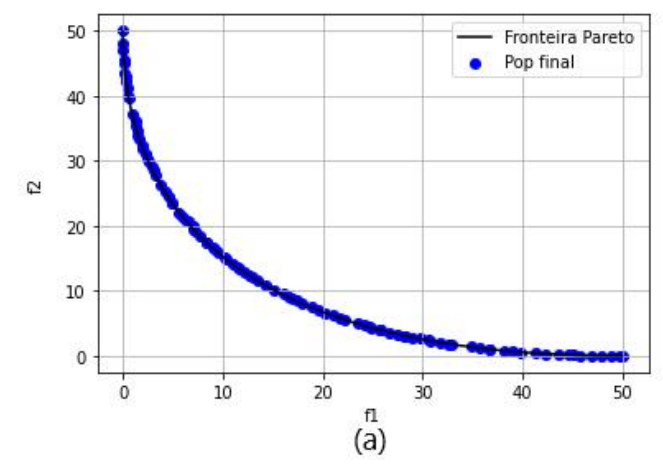

In [1]:
from IPython.display import Image, display
img_path = 'BINH1.png'
display(Image(filename=img_path))

### Problema POLONI

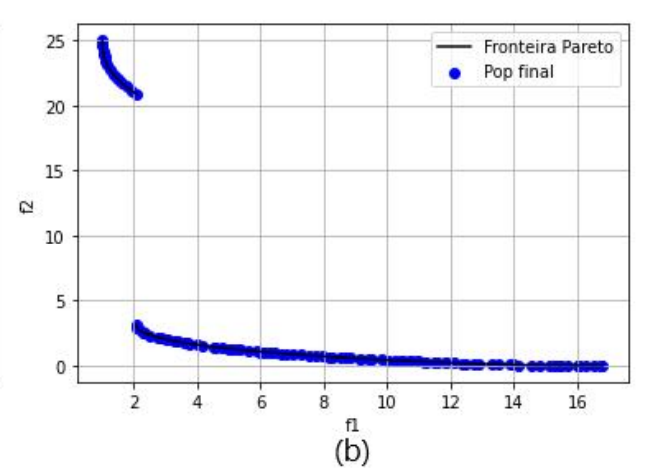

In [2]:
img_path = 'POLONI.png'
display(Image(filename=img_path))

### Problema ZDT4

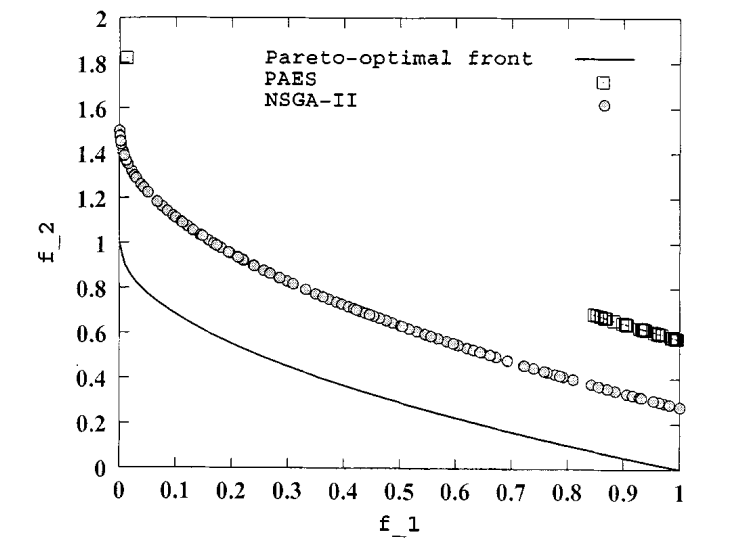

In [3]:
img_path = 'ZDT4.png'
display(Image(filename=img_path))